In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate motion with constant velocity and noisy position measurements

/tmp/ipykernel_3486/3506255251.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimates, 'b-', label='Kalman Filter Estimate',c="blue")


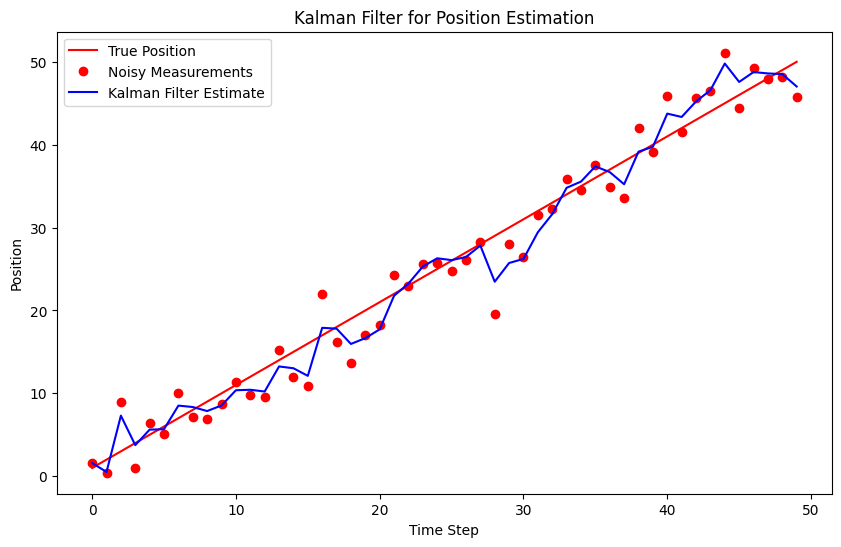

In [5]:
#time step
dt = 1.0
F = np.array([
            [1,dt],
            [0,1]
            ])

# observation matrix(we only mesure the position)
H = np.array([[1,0]])

# Process noise covariance matrix (uncertainty in model prediction)
Q = np.array([
            [1,0],
            [0,1]
            ])

# Measurement noise covariance matrix (uncertainty in measurement)
R = np.array([[10]])

# Initial state estimate (position and velocity)
x = np.array([[0],  # Initial position
              [1]])  # Initial velocity

# Initial estimate covariance matrix
P = np.array([[500, 0], 
              [0, 500]])

# Number of iterations (time steps)
n = 50

# Simulated true positions and noisy measurements
true_positions = []
measurements = []
velocities = []
position = 0
velocity = 1

for i in range(n):
    # True position and velocity (without noise)
    position += velocity * dt
    true_positions.append(position)
    
    # Noisy measurement (position)
    noisy_measurement = position + np.random.normal(0, np.sqrt(R[0, 0]))
    measurements.append(noisy_measurement)

# Kalman filter process
estimates = []  # Store position estimates
for i in range(n):
    # Prediction Step
    x = np.dot(F, x)  # State prediction
    P = np.dot(np.dot(F, P), F.T) + Q  # Covariance prediction
    
    # Measurement update step (if we have a measurement)
    z = np.array([[measurements[i]]])  # Current measurement (noisy position)
    y = z - np.dot(H, x)  # Innovation (residual)
    S = np.dot(H, np.dot(P, H.T)) + R  # Innovation covariance
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S))  # Kalman gain
    
    x = x + np.dot(K, y)  # Updated state estimate
    P = np.dot(np.eye(2) - np.dot(K, H), P)  # Updated covariance estimate
    
    # Store the estimate
    estimates.append(x[0, 0])


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(true_positions, label='True Position',c="red",)
plt.plot(measurements, 'ro', label='Noisy Measurements')
plt.plot(estimates, 'b-', label='Kalman Filter Estimate',c="blue")
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter for Position Estimation')
plt.show()
